##  <center> ENTENDIMIENTO DE IMÁGENES DE PERSONAS <br><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="20%" height="15%" /><br>Andrea Carolina Reales Villalba -- Jesus Eduardo Ortiz Sandoval <BR>Punto 3 </center>


<a id="tercero"></a>
## 3. Entendimiento de imágenes de personas

El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante dificil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.


<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />

En esta actividad trabajaremos con unos datos (imágenes) con la tarea de predecir la **edad** (*target value*) de la persona en la imagen. Los datos con corresponden a 3640 imágenes de Flickr de rostros de personas, pero, debido a que trabajamos con redes *feed forward*, se trabajará con representaciones de características extraídas. Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.

wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:

Para descripción sobre las columnas están en el archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:

wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt

<div class=text-justify><b> a) Cargue los datos dos dataset de entrenamiento y de pruebas ¿Cuántos datos hay en cada conjunto?</b></div>

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from keras import regularizers
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import scipy.io as sio

In [6]:
mat_train = sio.loadmat("C:/Users/Jesus/Documents/GitHub/AgeGenderClassification/eventrain.mat")
mat_test = sio.loadmat("C:/Users/Jesus/Documents/GitHub/AgeGenderClassification/eventest.mat")
data_train= mat_train["trcoll"][0][0]
data_test= mat_test["tecoll"][0][0]
x=len(data_train)
y=len(data_train[0])
z=x*y
print("Numero de caracteristicas de entrada=",x,"Total de muestras=",y,"Total datos entrenamiento=",z)
x1=len(data_test)
y1=len(data_test[0])
z1=x1*y1
print("Numero de caracteristicas de entrada=",x1,"Total de muestras=",y1,"Total datos test=",z1)

Numero de caracteristicas de entrada= 11 Total de muestras= 3500 Total datos entrenamiento= 38500
Numero de caracteristicas de entrada= 11 Total de muestras= 1050 Total datos test= 11550


<div class=text-justify><b> b) Eliga cuál representación utilizará para trabajar los datos y entregárselos como *input* al modelo neuronal denso. Además extraiga las etiquetas del problema. Describa los datos utilziados. </b></div>

In [7]:
ageClass_train = data_train[1] #target
ffcoefs_train = data_train[3]   #it can be used as representation: fisherface space
X_train=ffcoefs_train[:int(0.8*y)]                       
X_val=ffcoefs_train[int(0.8*y)::]
y_train=ageClass_train[:int(0.8*y)]                       
y_val=ageClass_train[int(0.8*y)::]    
y_test = data_test[1] #target test
X_test = data_test[3]   #it can be used as representation: fisherface space

In [8]:
y_train

array([[51],
       [28],
       [28],
       ...,
       [16],
       [ 1],
       [10]], dtype=uint8)

In [9]:
import keras
y_onehot = keras.utils.to_categorical(y_train,num_classes=76)
y_onehot1 = keras.utils.to_categorical(y_val,num_classes=76)
y_onehot2 = keras.utils.to_categorical(y_test,num_classes=76)

###### <div class=text-justify><b>c) Defina y entrene una modelo de red neuronal *feed forward* para la inferencia de la edad de la persona a través de la representación escogida. Intente llegar a un *mse* menor a 100 en el conjunto de pruebas. Recuerde que **NO** puede seleccionar modelos a través del conjunto de pruebas. Visualice sus resultados si estima conveniente.</b></div>

*Nota: Puede notar que la cantidad de edades presentes en el problema son pocas (1,  5, 10, 16, 28, 51 o 75 años), por lo que puede tratar al problema así como de regresión o clasificación (considerando cada edad como una clase)*


In [42]:
model = Sequential()
idim=X_train.shape[1]
model.add(Dense(10,input_dim=idim,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(10,input_dim=idim,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(76, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = Adam(lr=0.1)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics = ["accuracy"])
history = model.fit(X_train, y_onehot, epochs=30,  validation_data=(X_val, y_onehot1))

Train on 2800 samples, validate on 700 samples
Epoch 1/30


Exception ignored in: <bound method ScopedTFStatus.__del__ of <tensorflow.python.framework.c_api_util.ScopedTFStatus object at 0x0000020CD8116D30>>
Traceback (most recent call last):
  File "C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 39, in __del__
    c_api.TF_DeleteStatus(self.status)
AttributeError: 'ScopedTFStatus' object has no attribute 'status'


2800/2800 [==============================] - 2s 675us/step - loss: 8.6383 - acc: 0.1289 - val_loss: 6.7118 - val_acc: 0.3271
Epoch 2/30
2800/2800 [==============================] - 0s 85us/step - loss: 7.2093 - acc: 0.0968 - val_loss: 9.1193 - val_acc: 0.3271
Epoch 3/30
2800/2800 [==============================] - 0s 81us/step - loss: 5.6875 - acc: 0.0968 - val_loss: 6.8617 - val_acc: 0.3271
Epoch 4/30
2800/2800 [==============================] - 0s 80us/step - loss: 5.5033 - acc: 0.0968 - val_loss: 7.3683 - val_acc: 0.3271
Epoch 5/30
2800/2800 [==============================] - 0s 76us/step - loss: 8.2945 - acc: 0.0968 - val_loss: 6.6314 - val_acc: 0.3271
Epoch 6/30
2800/2800 [==============================] - 0s 76us/step - loss: 5.6932 - acc: 0.0968 - val_loss: 6.6314 - val_acc: 0.3271
Epoch 7/30
2800/2800 [==============================] - 0s 76us/step - loss: 4.0986 - acc: 0.0968 - val_loss: 6.6314 - val_acc: 0.3271
Epoch 8/30
2800/2800 [==============================] - 0s 78us/s

In [95]:
model = Sequential()
idim=X_train.shape[1]
model.add(Dense(10,input_dim=idim,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(10,input_dim=idim,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(76, kernel_initializer='uniform'))
model.add(Activation('softmax'))
sgd = Adam(lr=0.02)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics = ["accuracy"])
history = model.fit(X_train, y_onehot, epochs=30,  validation_data=(X_val, y_onehot1))

Train on 2800 samples, validate on 700 samples
Epoch 1/30
2800/2800 [==============================] - 4s 2ms/step - loss: 2.3547 - acc: 0.1618 - val_loss: 2.3880 - val_acc: 0.0786
Epoch 2/30
2800/2800 [==============================] - 0s 143us/step - loss: 1.9067 - acc: 0.1675 - val_loss: 2.0551 - val_acc: 0.0000e+00
Epoch 3/30
2800/2800 [==============================] - 0s 159us/step - loss: 1.8438 - acc: 0.2093 - val_loss: 1.9882 - val_acc: 0.0271
Epoch 4/30
2800/2800 [==============================] - 0s 147us/step - loss: 1.7478 - acc: 0.2643 - val_loss: 2.0616 - val_acc: 0.0543
Epoch 5/30
2800/2800 [==============================] - 0s 145us/step - loss: 1.6832 - acc: 0.2736 - val_loss: 1.9391 - val_acc: 0.1400
Epoch 6/30
2800/2800 [==============================] - 0s 147us/step - loss: 1.6618 - acc: 0.2861 - val_loss: 1.9191 - val_acc: 0.0771
Epoch 7/30
2800/2800 [==============================] - 0s 144us/step - loss: 1.6510 - acc: 0.2936 - val_loss: 2.0024 - val_acc: 0.0571

Text(0.5, 0, 'Epochs')

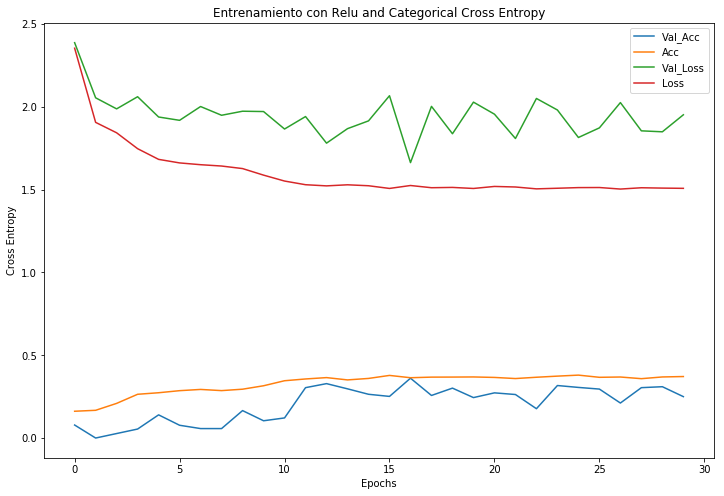

In [96]:
plt.figure(1,figsize=(12,8))
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(('Val_Acc', 'Acc' ,'Val_Loss','Loss'))
plt.title('Entrenamiento con Relu and Categorical Cross Entropy')
plt.ylabel('Cross Entropy')
plt.xlabel('Epochs')

In [99]:
model = Sequential()
idim=X_train.shape[1]
model.add(Dense(10,input_dim=idim,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(10,input_dim=idim,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(76, kernel_initializer='uniform'))
model.add(Activation('softmax'))
sgd = Adam(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics = ["accuracy"])
history = model.fit(X_train, y_onehot, epochs=100,  validation_data=(X_val, y_onehot1))

Train on 2800 samples, validate on 700 samples
Epoch 1/100
2800/2800 [==============================] - 5s 2ms/step - loss: 2.4188 - acc: 0.1604 - val_loss: 2.3008 - val_acc: 0.0000e+00
Epoch 2/100
2800/2800 [==============================] - 0s 145us/step - loss: 1.9116 - acc: 0.1661 - val_loss: 2.2847 - val_acc: 0.0786
Epoch 3/100
2800/2800 [==============================] - 0s 145us/step - loss: 1.8791 - acc: 0.1850 - val_loss: 2.2459 - val_acc: 0.0057
Epoch 4/100
2800/2800 [==============================] - 0s 147us/step - loss: 1.8228 - acc: 0.2246 - val_loss: 2.0571 - val_acc: 0.1257
Epoch 5/100
2800/2800 [==============================] - 0s 164us/step - loss: 1.7612 - acc: 0.2596 - val_loss: 2.0061 - val_acc: 0.0429
Epoch 6/100
2800/2800 [==============================] - 0s 158us/step - loss: 1.7018 - acc: 0.2911 - val_loss: 1.9436 - val_acc: 0.0471
Epoch 7/100
2800/2800 [==============================] - 0s 157us/step - loss: 1.6568 - acc: 0.2950 - val_loss: 1.8314 - val_acc:

2800/2800 [==============================] - 0s 153us/step - loss: 1.3249 - acc: 0.4657 - val_loss: 1.7683 - val_acc: 0.3486
Epoch 61/100
2800/2800 [==============================] - 0s 148us/step - loss: 1.3285 - acc: 0.4550 - val_loss: 1.8090 - val_acc: 0.3643
Epoch 62/100
2800/2800 [==============================] - 0s 167us/step - loss: 1.3352 - acc: 0.4568 - val_loss: 1.8665 - val_acc: 0.3529
Epoch 63/100
2800/2800 [==============================] - 0s 152us/step - loss: 1.3243 - acc: 0.4611 - val_loss: 1.7956 - val_acc: 0.3557
Epoch 64/100
2800/2800 [==============================] - 0s 147us/step - loss: 1.3236 - acc: 0.4675 - val_loss: 1.9849 - val_acc: 0.3029
Epoch 65/100
2800/2800 [==============================] - 0s 147us/step - loss: 1.3310 - acc: 0.4568 - val_loss: 1.7709 - val_acc: 0.3829
Epoch 66/100
2800/2800 [==============================] - 0s 148us/step - loss: 1.3231 - acc: 0.4629 - val_loss: 1.9198 - val_acc: 0.3286
Epoch 67/100
2800/2800 [=======================

Text(0.5, 0, 'Epochs')

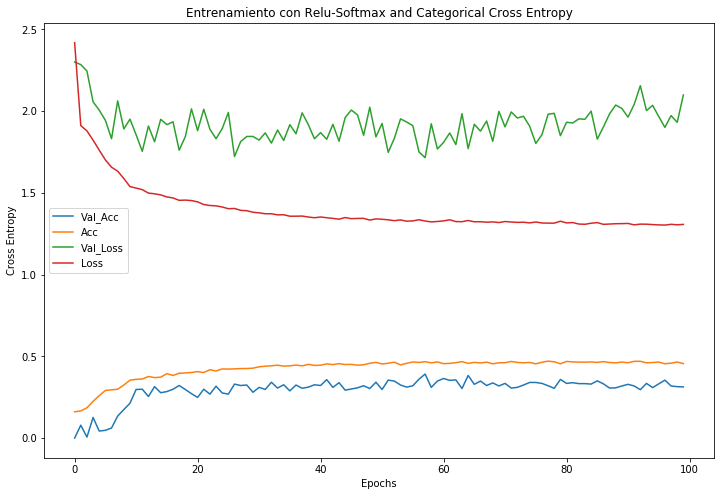

In [101]:
plt.figure(1,figsize=(12,8))
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(('Val_Acc', 'Acc' ,'Val_Loss','Loss'))
plt.title('Entrenamiento con Relu-Softmax and Categorical Cross Entropy')
plt.ylabel('Cross Entropy')
plt.xlabel('Epochs')

In [ ]:
model = Sequential()
idim=X_train.shape[1]
model.add(Dense(20,input_dim=idim,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(40,input_dim=idim,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(60,input_dim=idim,kernel_initializer='uniform'))
model.add(Activation('relu'))
model.add(Dense(76, kernel_initializer='uniform'))
model.add(Activation('softmax'))
sgd = Adam(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics = ["accuracy"])
history = model.fit(X_train, y_onehot, epochs=250,  validation_data=(X_val, y_onehot1))

Train on 2800 samples, validate on 700 samples
Epoch 1/250
2800/2800 [==============================] - 6s 2ms/step - loss: 3.5382 - acc: 0.1536 - val_loss: 2.3287 - val_acc: 0.0000e+00
Epoch 2/250
2800/2800 [==============================] - 1s 183us/step - loss: 1.9220 - acc: 0.1768 - val_loss: 2.3198 - val_acc: 0.0000e+00
Epoch 3/250
2800/2800 [==============================] - 1s 183us/step - loss: 1.9119 - acc: 0.1704 - val_loss: 2.3066 - val_acc: 0.0000e+00
Epoch 4/250
2800/2800 [==============================] - 1s 192us/step - loss: 1.9059 - acc: 0.1743 - val_loss: 2.3273 - val_acc: 0.0000e+00
Epoch 5/250
2800/2800 [==============================] - 1s 202us/step - loss: 1.8984 - acc: 0.1768 - val_loss: 2.3094 - val_acc: 0.0000e+00
Epoch 6/250
2800/2800 [==============================] - 1s 191us/step - loss: 1.8854 - acc: 0.1771 - val_loss: 2.3601 - val_acc: 0.0000e+00
Epoch 7/250
2800/2800 [==============================] - 1s 179us/step - loss: 1.8756 - acc: 0.1704 - val_los

Epoch 60/250
2800/2800 [==============================] - 1s 203us/step - loss: 1.4190 - acc: 0.3993 - val_loss: 1.9483 - val_acc: 0.2686
Epoch 61/250
2800/2800 [==============================] - 1s 183us/step - loss: 1.4180 - acc: 0.4046 - val_loss: 1.8431 - val_acc: 0.2986
Epoch 62/250
2800/2800 [==============================] - 1s 190us/step - loss: 1.4151 - acc: 0.4018 - val_loss: 1.8168 - val_acc: 0.3243
Epoch 63/250
2800/2800 [==============================] - 1s 180us/step - loss: 1.4145 - acc: 0.4114 - val_loss: 1.7759 - val_acc: 0.3400
Epoch 64/250
2800/2800 [==============================] - 0s 178us/step - loss: 1.4161 - acc: 0.4018 - val_loss: 1.8916 - val_acc: 0.2800
Epoch 65/250
2800/2800 [==============================] - 1s 180us/step - loss: 1.4113 - acc: 0.4136 - val_loss: 1.9896 - val_acc: 0.2714
Epoch 66/250
2800/2800 [==============================] - 1s 212us/step - loss: 1.4069 - acc: 0.4114 - val_loss: 1.9848 - val_acc: 0.2729
Epoch 67/250
2800/2800 [==========

2800/2800 [==============================] - 1s 225us/step - loss: 1.3093 - acc: 0.4600 - val_loss: 1.8698 - val_acc: 0.3271
Epoch 120/250
2800/2800 [==============================] - 1s 235us/step - loss: 1.3103 - acc: 0.4550 - val_loss: 1.9538 - val_acc: 0.3057
Epoch 121/250
2800/2800 [==============================] - 1s 239us/step - loss: 1.3051 - acc: 0.4589 - val_loss: 1.8610 - val_acc: 0.3257
Epoch 122/250
2800/2800 [==============================] - 1s 208us/step - loss: 1.3076 - acc: 0.4607 - val_loss: 1.8251 - val_acc: 0.3271
Epoch 123/250
2800/2800 [==============================] - 1s 200us/step - loss: 1.3019 - acc: 0.4664 - val_loss: 1.9228 - val_acc: 0.3200
Epoch 124/250
2800/2800 [==============================] - 1s 238us/step - loss: 1.3021 - acc: 0.4596 - val_loss: 1.9396 - val_acc: 0.3071
Epoch 125/250
2800/2800 [==============================] - 1s 213us/step - loss: 1.3002 - acc: 0.4643 - val_loss: 1.8946 - val_acc: 0.3257
Epoch 126/250
2800/2800 [================

2784/2800 [============================>.] - ETA: 0s - loss: 1.2398 - acc: 0.5011

Text(0.5, 0, 'Epochs')

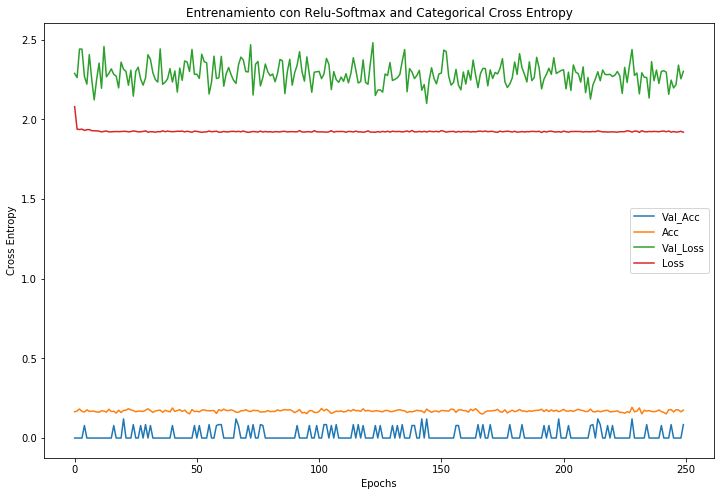

In [108]:
plt.figure(1,figsize=(12,8))
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(('Val_Acc', 'Acc' ,'Val_Loss','Loss'))
plt.title('Entrenamiento con Relu-Softmax and Categorical Cross Entropy')
plt.ylabel('Cross Entropy')
plt.xlabel('Epochs')